# 頭肩型態識別演算法

## 程式實作：頭肩型態識別函式  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

In [2]:
# 來源 ： https://github.com/neurotrader888/TechnicalAnalysisAutomation/blob/main/head_shoulders.py
from myutils.HeadShoulders import find_hs_patterns

In [3]:
def FindingHeadShoulderPatterns(prices, order = 1, early_find = False) :
    # 價格資料確認與處理
    if prices is None and type(prices) is not DataFrame:
        return None
    in_prices = prices.copy()
    if 'Open' not in in_prices.columns or 'High' not in in_prices.columns or 'Low' not in in_prices.columns or 'Close' not in in_prices.columns :
        return None    
    if 'Date' not in in_prices.columns and in_prices.index.dtype == 'datetime64[ns]' :
        in_prices.index.name = 'Date'
        in_prices = in_prices.reset_index()
    if 'Date' not in in_prices.columns :
        return None
    prices_close=np.array(in_prices['Close'])
    # 尋找頭肩型態
    hs_patterns, ihs_patterns = find_hs_patterns(prices_close, order=order, early_find=early_find)
    # 轉換為輸出格式
    patterns = []
    for pattern in hs_patterns:
        pattern_points = []
        # 頭肩型態的左肩
        pattern_points.append([pattern.l_shoulder,in_prices.iloc[pattern.l_shoulder]['Date'].strftime("%Y-%m-%d"),pattern.l_shoulder_p])
        # 頭肩型態的左腋窩
        pattern_points.append([pattern.l_armpit,in_prices.iloc[pattern.l_armpit]['Date'].strftime("%Y-%m-%d"),pattern.l_armpit_p])
        # 頭肩型態的頭
        pattern_points.append([pattern.head,in_prices.iloc[pattern.head]['Date'].strftime("%Y-%m-%d"),pattern.head_p])
        # 頭肩型態的右腋窩
        pattern_points.append([pattern.r_armpit,in_prices.iloc[pattern.r_armpit]['Date'].strftime("%Y-%m-%d"),pattern.r_armpit_p])
        # 頭肩型態的右肩
        pattern_points.append([pattern.r_shoulder,in_prices.iloc[pattern.r_shoulder]['Date'].strftime("%Y-%m-%d"),pattern.r_shoulder_p])
        
        # 頸線開始與結束日期及價格
        neckline_start_date  = in_prices.iloc[pattern.start_i]['Date'].strftime("%Y-%m-%d")
        neckline_start_price = pattern.neck_start
        neckline_end_date    = in_prices.iloc[pattern.break_i]['Date'].strftime("%Y-%m-%d")
        neckline_end_price   = pattern.neck_end
        neckline_info = {'start_date' : neckline_start_date,'start_price' : neckline_start_price, 'end_date' : neckline_end_date, 'end_price' : neckline_end_price}
        
        # 頭肩型態的頭部資訊
        head_info = { 'width': pattern.head_width, 'height': pattern.head_height }
        
        # 頭肩頂
        patterns.append({ 'type': 'Top', 'points': pattern_points, 'neckline': neckline_info, 'head': head_info })
    for pattern in ihs_patterns:
        pattern_points = []
        # 頭肩型態的左肩
        pattern_points.append([pattern.l_shoulder,in_prices.iloc[pattern.l_shoulder]['Date'].strftime("%Y-%m-%d"),pattern.l_shoulder_p])
        # 頭肩型態的左腋窩
        pattern_points.append([pattern.l_armpit,in_prices.iloc[pattern.l_armpit]['Date'].strftime("%Y-%m-%d"),pattern.l_armpit_p])
        # 頭肩型態的頭
        pattern_points.append([pattern.head,in_prices.iloc[pattern.head]['Date'].strftime("%Y-%m-%d"),pattern.head_p])
        # 頭肩型態的右腋窩
        pattern_points.append([pattern.r_armpit,in_prices.iloc[pattern.r_armpit]['Date'].strftime("%Y-%m-%d"),pattern.r_armpit_p])
        # 頭肩型態的右肩
        pattern_points.append([pattern.r_shoulder,in_prices.iloc[pattern.r_shoulder]['Date'].strftime("%Y-%m-%d"),pattern.r_shoulder_p])
        
        # 頸線開始與結束日期及價格
        neckline_start_date  = in_prices.iloc[pattern.start_i]['Date'].strftime("%Y-%m-%d")
        neckline_start_price = pattern.neck_start
        neckline_end_date    = in_prices.iloc[pattern.break_i]['Date'].strftime("%Y-%m-%d")
        neckline_end_price   = pattern.neck_end
        neckline_info = {'start_date' : neckline_start_date,'start_price' : neckline_start_price, 'end_date' : neckline_end_date, 'end_price' : neckline_end_price}
        
        # 頭肩型態的頭部資訊
        head_info = { 'width': pattern.head_width, 'height': pattern.head_height }
        
        # 頭肩底
        patterns.append({ 'type': 'Bottom', 'points': pattern_points, 'neckline': neckline_info, 'head': head_info })
    return patterns

## 程式實作：識別頭肩底型態

In [4]:
##### 使用2022年2月25日到2023年4月7日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day13_Day14_Day24.xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

[{'type': 'Bottom', 'points': [[111, '2022-08-08', 50.8], [130, '2022-09-02', 58.0], [157, '2022-10-13', 39.4], [192, '2022-12-01', 58.4], [209, '2022-12-26', 51.4]], 'neckline': {'start_date': '2022-07-20', 'start_price': 57.79354838709678, 'end_date': '2023-01-09', 'end_price': 58.567741935483866}, 'head': {'width': 62, 'height': 18.774193548387096}}]


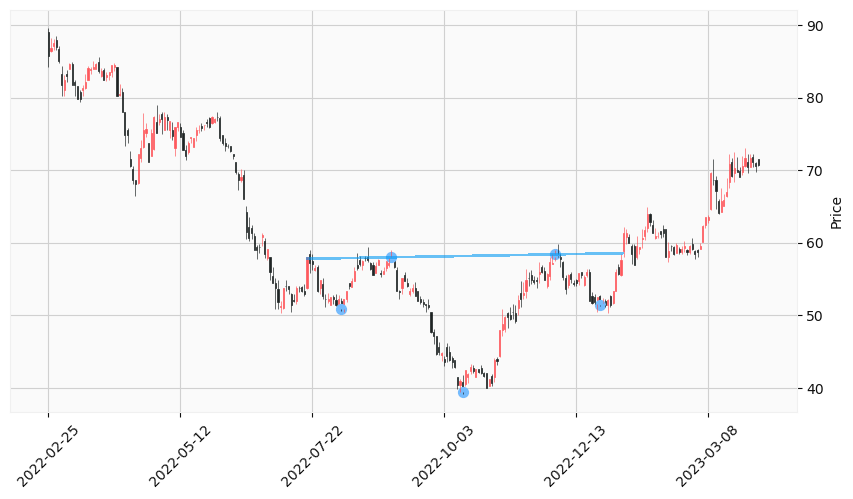

In [5]:
patterns = FindingHeadShoulderPatterns(df_k_line, 10)
print(patterns)

for pattern in patterns :
    pattern_points_len = len(np.array(df_k_line['Close']))
    pattern_points = np.array([np.nan]*pattern_points_len)
    head_shoulder_points = pattern['points']
    pattern_points[head_shoulder_points[0][0]] = head_shoulder_points[0][2]
    pattern_points[head_shoulder_points[1][0]] = head_shoulder_points[1][2]
    pattern_points[head_shoulder_points[2][0]] = head_shoulder_points[2][2]
    pattern_points[head_shoulder_points[3][0]] = head_shoulder_points[3][2]
    pattern_points[head_shoulder_points[4][0]] = head_shoulder_points[4][2]
    head_shoulder_neckline = pattern['neckline']
    head_shoulder_head     = pattern['head']
    # 設定K線格式
    mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
    s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)
    # 設定頸線
    seq_of_seq_of_points=[
        [(head_shoulder_neckline['start_date'],head_shoulder_neckline['start_price']),(head_shoulder_neckline['end_date'],head_shoulder_neckline['end_price'])]
    ]
    # 設定轉折點
    apds = [
        mpf.make_addplot(pattern_points,type='scatter',marker='o',markersize=50,color='xkcd:sky blue')
    ]
    # 繪出K線圖
    kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=apds,alines=dict(alines=seq_of_seq_of_points, linewidths=1.2, colors='xkcd:azure', alpha=0.6), datetime_format='%Y-%m-%d')
    mpf.plot(df_k_line,**kwargs)